In [3]:
import pandas as pd

In [26]:
df=pd.read_csv(r"C:\Users\shriy\Actual_data_cdac.csv", nrows=5000000)

In [27]:
df.head()

,t_dat,article_id,price,product_code,product_type_no,product_group_name
0,2018-09-20,663713001,0.050831,663713,283,Underwear
1,2018-09-20,663713001,0.049475,663713,283,Underwear
2,2018-09-20,663713001,0.050831,663713,283,Underwear
3,2018-09-20,663713001,0.050831,663713,283,Underwear
4,2018-09-20,663713001,0.050831,663713,283,Underwear


In [28]:
df['t_dat'] = pd.to_datetime(df['t_dat'])

In [29]:
grouped = df.groupby(['t_dat', 'product_type_no']).size().reset_index(name='quantity_sold')

# Merge the grouped data back to the original DataFrame
merged_df = pd.merge(df, grouped, on=['t_dat', 'product_type_no'], how='left')

# Print the updated DataFrame
merged_df

,t_dat,article_id,price,product_code,product_type_no,product_group_name,quantity_sold
0,2018-09-20,663713001,0.050831,663713,283,Underwear,96
1,2018-09-20,663713001,0.049475,663713,283,Underwear,96
2,2018-09-20,663713001,0.050831,663713,283,Underwear,96
3,2018-09-20,663713001,0.050831,663713,283,Underwear,96
4,2018-09-20,663713001,0.050831,663713,283,Underwear,96
...,...,...,...,...,...,...,...
4999995,2018-09-29,514482002,0.025407,514482,306,Underwear,3104
4999996,2018-09-29,514482002,0.025407,514482,306,Underwear,3104
4999997,2018-09-29,514482002,0.025407,514482,306,Underwear,3104
4999998,2018-09-29,514482002,0.020339,514482,306,Underwear,3104


In [30]:
# Specify the product type you want to filter for
product_type_to_filter = 'Underwear'

# Filter the DataFrame for the specified product type
filtered_df = merged_df[merged_df['product_group_name'] == product_type_to_filter]

# Print the filtered DataFrame
filtered_df[['t_dat', 'product_group_name', 'quantity_sold']]

,t_dat,product_group_name,quantity_sold
0,2018-09-20,Underwear,96
1,2018-09-20,Underwear,96
2,2018-09-20,Underwear,96
3,2018-09-20,Underwear,96
4,2018-09-20,Underwear,96
...,...,...,...
4999995,2018-09-29,Underwear,3104
4999996,2018-09-29,Underwear,3104
4999997,2018-09-29,Underwear,3104
4999998,2018-09-29,Underwear,3104


In [31]:
filtered_df_no_duplicates = filtered_df.drop_duplicates(subset=['t_dat'])

# Print the DataFrame without duplicate rows
print(filtered_df_no_duplicates[['t_dat', 'product_group_name', 'quantity_sold']])

            t_dat product_group_name  quantity_sold
0      2018-09-20          Underwear             96
6      2018-09-21          Underwear            101
13     2018-09-22          Underwear             45
15     2018-09-23          Underwear             92
26     2018-09-24          Underwear             91
...           ...                ...            ...
113748 2020-09-21          Underwear             57
113765 2020-09-22          Underwear             34
487219 2020-04-12          Underwear             34
487244 2020-04-13          Underwear             43
551163 2020-05-05          Underwear             18

[734 rows x 3 columns]


In [32]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

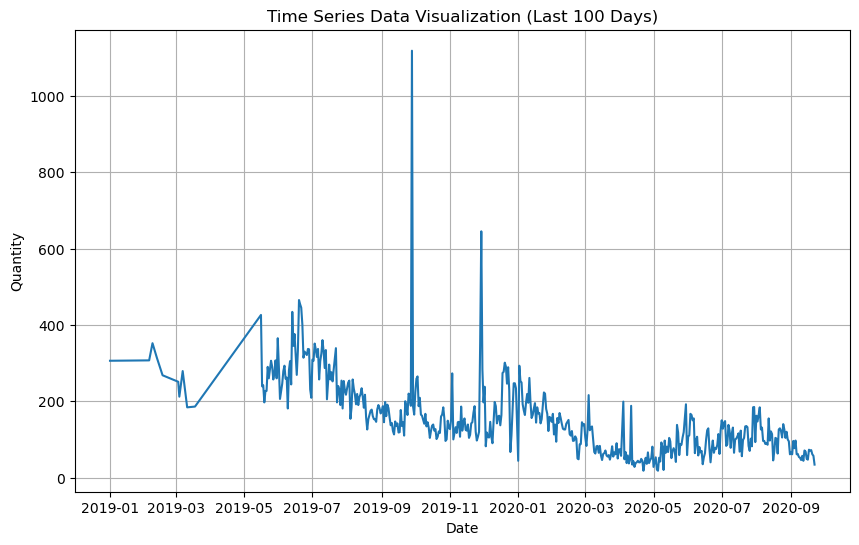

In [33]:
import matplotlib.pyplot as plt


import seaborn as sns

recent_df = filtered_df_no_duplicates.tail(500)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=recent_df, x=recent_df.t_dat, y='quantity_sold')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Data Visualization (Last 100 Days)')
plt.grid(True)
plt.show()


In [34]:
adf_result = adfuller(filtered_df_no_duplicates['quantity_sold'])
p_value = adf_result[1]

print("ADF Statistic:", adf_result[0])
print("p-value:", p_value)
if p_value <= 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")


ADF Statistic: -2.3114902280485157
p-value: 0.16828891977300464
The data is not stationary.


In [35]:
filtered_df_no_duplicates['quantity_sold'].isnull().sum()

0

In [36]:
# Apply differencing to make the data stationary
filtered_df_no_duplicates['quantity_sold_diff'] = filtered_df_no_duplicates['quantity_sold'].diff()

# Drop rows with NaN values in the differenced column
filtered_df_no_duplicates.dropna(subset=['quantity_sold_diff'], inplace=True)

# Check for stationarity using ADF test
adf_result_diff = adfuller(filtered_df_no_duplicates['quantity_sold_diff'])
p_value_diff = adf_result_diff[1]

# Display ADF test results for the differenced data
print("ADF Statistic (Differenced Data):", adf_result_diff[0])
print("p-value (Differenced Data):", p_value_diff)
if p_value_diff <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is not stationary.")


ADF Statistic (Differenced Data): -9.725504524952132
p-value (Differenced Data): 9.297819818879289e-17
The differenced data is stationary.


C:\Users\shriy\AppData\Local\Temp\ipykernel_15924\54569157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_duplicates['quantity_sold_diff'] = filtered_df_no_duplicates['quantity_sold'].diff()
C:\Users\shriy\AppData\Local\Temp\ipykernel_15924\54569157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_duplicates.dropna(subset=['quantity_sold_diff'], inplace=True)


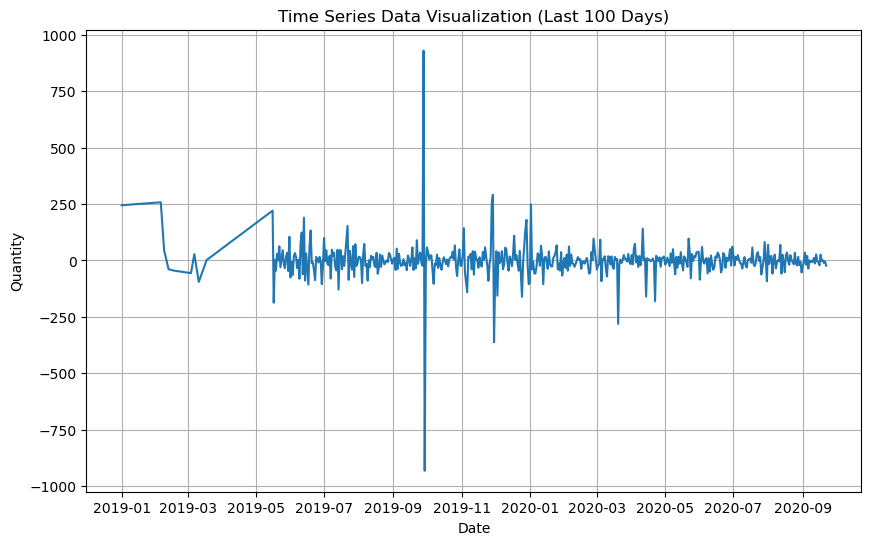

In [37]:

# Visualize the differenced quantity sold time series
import matplotlib.pyplot as plt


import seaborn as sns

recent_df = filtered_df_no_duplicates.tail(500)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=recent_df, x=recent_df.t_dat, y='quantity_sold_diff')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Data Visualization (Last 100 Days)')
plt.grid(True)
plt.show()


In [38]:
filtered_df_no_duplicates.head()

,t_dat,article_id,price,product_code,product_type_no,product_group_name,quantity_sold,quantity_sold_diff
6,2018-09-21,663713001,0.050831,663713,283,Underwear,101,5.0
13,2018-09-22,663713001,0.050831,663713,283,Underwear,45,-56.0
15,2018-09-23,663713001,0.050831,663713,283,Underwear,92,47.0
26,2018-09-24,663713001,0.050831,663713,283,Underwear,91,-1.0
38,2018-09-25,663713001,0.050831,663713,283,Underwear,84,-7.0


In [39]:
filtered_df_no_duplicates.set_index('t_dat', inplace=True)


In [40]:
filtered_df_no_duplicates

,article_id,price,product_code,product_type_no,product_group_name,quantity_sold,quantity_sold_diff
t_dat,,,,,,,
2018-09-21,663713001,0.050831,663713,283,Underwear,101,5.0
2018-09-22,663713001,0.050831,663713,283,Underwear,45,-56.0
2018-09-23,663713001,0.050831,663713,283,Underwear,92,47.0
2018-09-24,663713001,0.050831,663713,283,Underwear,91,-1.0
2018-09-25,663713001,0.050831,663713,283,Underwear,84,-7.0
...,...,...,...,...,...,...,...
2020-09-21,611415001,0.016932,611415,286,Underwear,57,-4.0
2020-09-22,611415001,0.016932,611415,286,Underwear,34,-23.0
2020-04-12,464297007,0.016932,464297,286,Underwear,34,0.0


In [41]:
filtered_df_no_duplicates.reset_index(inplace=True)

C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

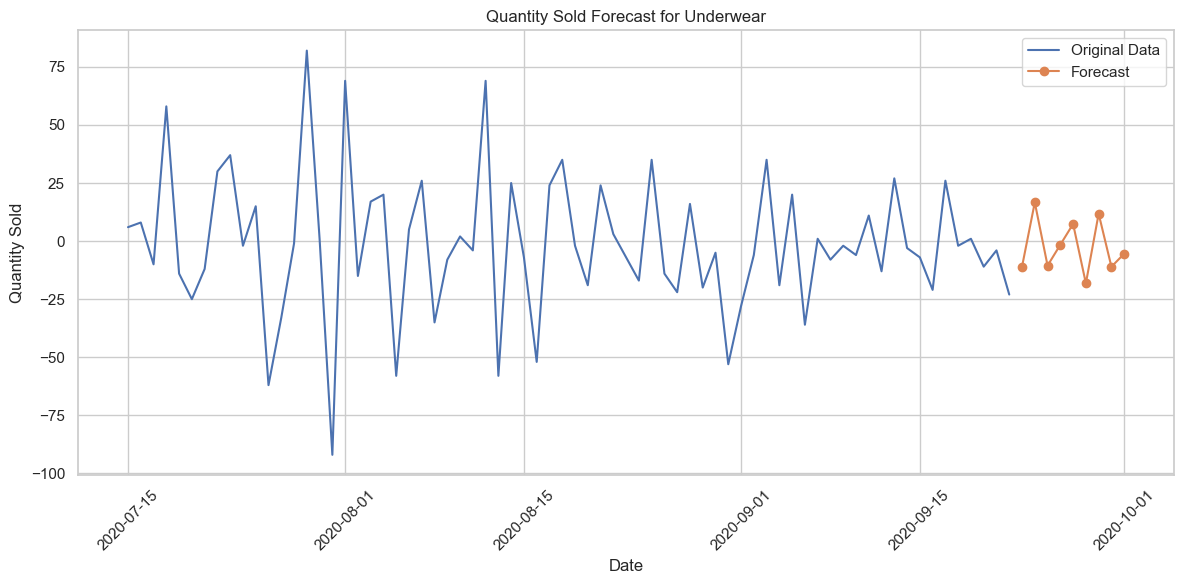

65.84703760974827


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error



# Choose a specific product category for forecasting (replace 'Category_A' with the actual category name)
selected_category = 'Underwear'

# Filter data for the selected category
category_data = filtered_df_no_duplicates[filtered_df_no_duplicates['product_group_name'] == selected_category]

last_70_days = category_data['t_dat'].max() - pd.DateOffset(days=70)
recent_data = category_data[category_data['t_dat'] > last_70_days]

# Train ARIMA model
p, d, q = 3, 1, 4 
model = ARIMA(recent_data['quantity_sold_diff'], order=(p, d, q))
results = model.fit()


# Forecast quantity sold for the next 7 days
forecast_steps = 9  # Forecast for the next 7 days
forecast = results.forecast(steps=forecast_steps)

# Create forecast dates for the next 7 days
forecast_dates = pd.date_range(start=recent_data['t_dat'].max(), periods=forecast_steps + 1, freq='D')[1:]





sns.set(style="whitegrid")

# Create the plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='t_dat', y='quantity_sold_diff', data=recent_data, label='Original Data')
plt.plot(forecast_dates, forecast, marker='o', linestyle='-', label='Forecast')
plt.legend()
plt.title(f'Quantity Sold Forecast for {selected_category}')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_squared_error


actual_values = recent_data['quantity_sold'].values[-forecast_steps:]
rmse = np.sqrt(mean_squared_error(actual_values, forecast))

print(rmse)


In [43]:
# Extract forecasted quantities for the next seven days
forecasted_quantities = forecast[:9]

# Print the forecasted quantities for the next seven days
for i, quantity in enumerate(forecasted_quantities):
    print(f"Day {i+1}: Forecasted Quantity Sold = {int(abs(quantity))}")

Day 1: Forecasted Quantity Sold = 11
Day 2: Forecasted Quantity Sold = 16
Day 3: Forecasted Quantity Sold = 10
Day 4: Forecasted Quantity Sold = 1
Day 5: Forecasted Quantity Sold = 7
Day 6: Forecasted Quantity Sold = 18
Day 7: Forecasted Quantity Sold = 11
Day 8: Forecasted Quantity Sold = 11
Day 9: Forecasted Quantity Sold = 5


C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


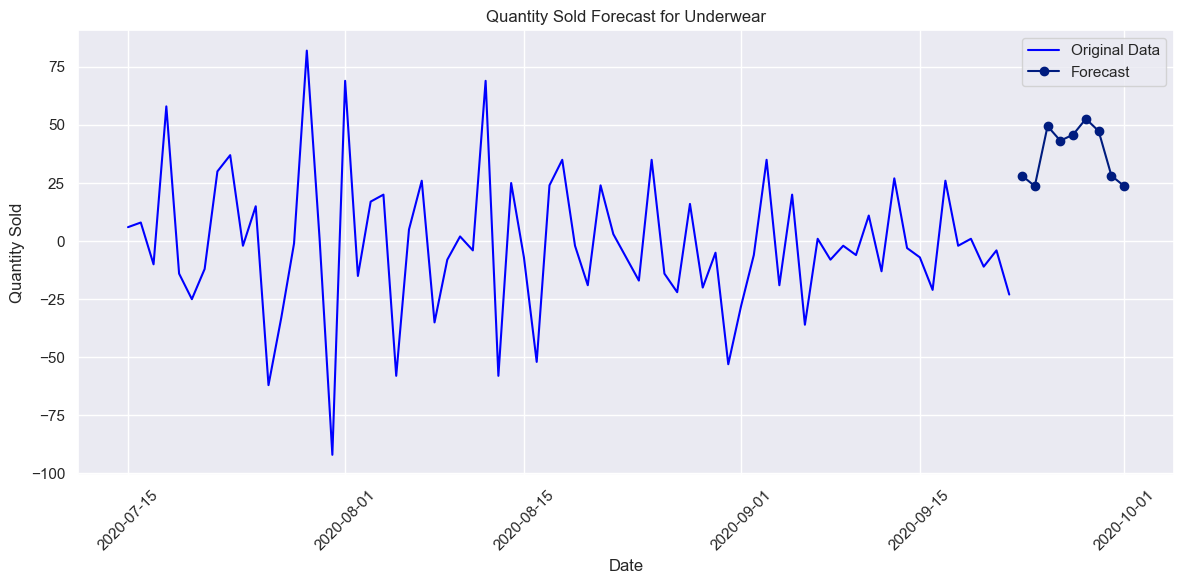

RMSE for Exponential Smoothing Forecast: 27.542003584618634


In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


# Train exponential smoothing model on the recent data
model_exponential = ExponentialSmoothing(recent_data['quantity_sold'], seasonal='add', seasonal_periods=7)
results_exponential = model_exponential.fit()

# Forecast quantity sold for the next 7 days using exponential smoothing
forecast_exponential = results_exponential.forecast(steps=forecast_steps)


# Plot original data and forecast

sns.set(style="darkgrid",palette='dark')

# Create the plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='t_dat', y='quantity_sold_diff', data=recent_data, label='Original Data',color='blue')
plt.plot(forecast_dates, forecast_exponential, marker='o', linestyle='-', label='Forecast')
plt.legend()
plt.title(f'Quantity Sold Forecast for {selected_category}')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Calculate RMSE for exponential smoothing forecast
rmse_exponential = np.sqrt(mean_squared_error(actual_values, forecast_exponential))

print("RMSE for Exponential Smoothing Forecast:", rmse_exponential)


In [45]:
# Extract forecasted quantities for the next seven days
forecasted_quantities = forecast_exponential[:9]

# Print the forecasted quantities for the next seven days
for i, quantity in enumerate(forecasted_quantities):
    print(f"Day {i+1}: Forecasted Quantity Sold = {int(abs(quantity))}")


Day 1: Forecasted Quantity Sold = 28
Day 2: Forecasted Quantity Sold = 23
Day 3: Forecasted Quantity Sold = 49
Day 4: Forecasted Quantity Sold = 43
Day 5: Forecasted Quantity Sold = 45
Day 6: Forecasted Quantity Sold = 52
Day 7: Forecasted Quantity Sold = 47
Day 8: Forecasted Quantity Sold = 28
Day 9: Forecasted Quantity Sold = 23


In [46]:
#HYBRID MODEL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns

# Choose a specific product category for forecasting (replace 'Category_A' with the actual category name)
selected_category = 'Underwear'

# Filter data for the selected category
category_data = filtered_df_no_duplicates[filtered_df_no_duplicates['product_group_name'] == selected_category]

last_70_days = category_data['t_dat'].max() - pd.DateOffset(days=70)
recent_data = category_data[category_data['t_dat'] > last_70_days]

# Train ETS model
ets_model = ExponentialSmoothing(recent_data['quantity_sold_diff'], seasonal='add', seasonal_periods=7)
ets_results = ets_model.fit()

# Train ARIMA model
p, d, q = 3, 1, 4
model = ARIMA(recent_data['quantity_sold_diff'], order=(p, d, q))
arima_results = model.fit()

# Combine ETS and ARIMA forecasts using a simple average
forecast_steps = 9  # Forecast for the next 7 days
ets_forecast = ets_results.forecast(steps=forecast_steps)
arima_forecast = arima_results.forecast(steps=forecast_steps)
hybrid_forecast = (ets_forecast + arima_forecast) / 2

# Create forecast dates for the next 7 days
forecast_dates = pd.date_range(start=recent_data['t_dat'].max(), periods=forecast_steps, freq='D')




C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shriy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer in

In [47]:
forecasted_quantities = hybrid_forecast[:9]

# Print the forecasted quantities for the next seven days
for i, quantity in enumerate(forecasted_quantities):
    print(f"Day {i+1}: Forecasted Quantity Sold = {int(abs(quantity))}")

Day 1: Forecasted Quantity Sold = 15
Day 2: Forecasted Quantity Sold = 6
Day 3: Forecasted Quantity Sold = 4
Day 4: Forecasted Quantity Sold = 4
Day 5: Forecasted Quantity Sold = 4
Day 6: Forecasted Quantity Sold = 6
Day 7: Forecasted Quantity Sold = 2
Day 8: Forecasted Quantity Sold = 15
Day 9: Forecasted Quantity Sold = 4


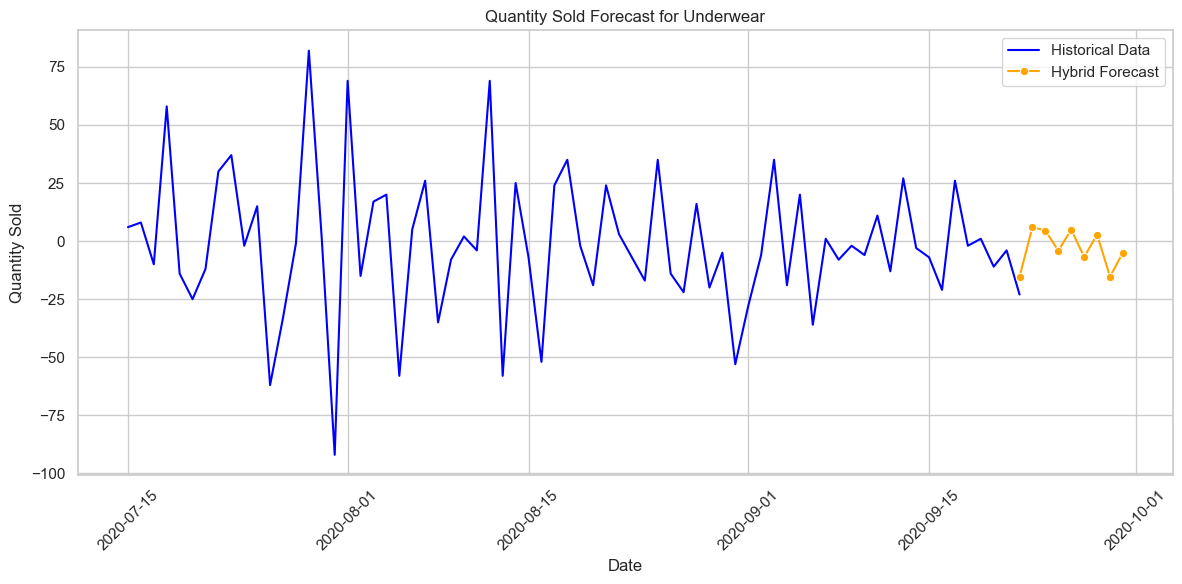

RMSE for Hybrid Forecast: 21.56


In [48]:
import seaborn as sns

# Create the plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot historical data
sns.lineplot(x='t_dat', y='quantity_sold_diff', data=recent_data, label='Historical Data', color='blue')

# Plot hybrid forecast
sns.lineplot(x=forecast_dates, y=hybrid_forecast, label='Hybrid Forecast', marker='o', linestyle='-', color='orange')

plt.legend()
plt.title(f'Quantity Sold Forecast for {selected_category}')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE for Hybrid Forecast
actual_values = recent_data['quantity_sold_diff'].tail(forecast_steps).values
rmse_hybrid = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))

print(f"RMSE for Hybrid Forecast: {rmse_hybrid:.2f}")
